<a href="https://colab.research.google.com/github/LashawnFofung/Python-Document-Preparation-and-Extraction/blob/main/cleaning_mortgage_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cleaning Loan Data Using Pandas**

Bank Personal Loan

Kaggle Dataset: bank_loan.csv

https://www.kaggle.com/datasets/arezalo/bank-personal-loan

Spreadsheet contains details of loan applications with each row representing an applicant with 15 column enteries for borrower details such as ID, age, income, mortgage, personal loan.



In [ ]:
#Data Preparation: Cleaning and structuring the bank loan dataset
#Fixing missing values, Standardizing numerical values, and cleaning text inconsistencies
#Essential step to ensure machine learning algorithms can effectively learn patterns and deliver high prediction performance.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset uploaded to Google CoLab prior to running script

#LOAD Bank Loan dataset
from google.colab import files

df = pd.read_csv('bank_loan.csv') #Read the file into Pandas
df.head() #Display the first 5 rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [ ]:
#INSPECT Bank Loan dataset


#(prints string "Dataset shape:" and then the count of rows, colums)
print(f"Dataset shape: {df.shape}")

#prints string "Column names:"
print("\nColumn names:")
print(df.columns.tolist())



#prints string "First 5 rows:" and then table of first 5 rows and columns
print("\nFirst 5 rows:")
display(df.head())



#prints string "Data types:"" for each column value type
print("\nData types:")
print(df.dtypes)


#prints the string "Missing values:"  and then the number of missing values in column
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (5000, 14)

Column names:
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

First 5 rows:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1



Data types:
ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

Missing values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
#IDENTIFY DATA QUALITY ISSUES in Bank Loan dataset


print("\n IDENTIFYING DATA QUALITY ISSUES")
print("="*40)


# Check CCAvg column format
print("CCAvg sample values:", df['CCAvg'].head(10).tolist())
print("CCAvg is in fraction format - needs conversion")


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


# Check age vs experience relationship
age_exp_issues = (df['Experience'] > df['Age'] - 18).sum()
print(f"Records where Experience > Age-18: {age_exp_issues}")



 IDENTIFYING DATA QUALITY ISSUES
CCAvg sample values: ['1/60', '1/50', '1/00', '2/70', '1/00', '0/40', '1/50', '0/30', '0/60', '8/90']
CCAvg is in fraction format - needs conversion
Duplicate rows: 0
Records where Experience > Age-18: 0


In [ ]:
#CLEAN the Bank Loan dataset

print("\n CLEANING DATA")
print("="*40)
df_cleaned = df.copy()


# Clean CCAvg column (convert from fraction format to decimal)

def convert_ccavg(value):
  """Convert CCAvg from '1/60' format to decimal"""

  try:
        if pd.isna(value) or value == '':
          return np.nan

        if isinstance(value, str) and '/' in value:
          parts = value.split('/')

          if len(parts) == 2:
              numerator = int(parts[0])
              denominator = int(parts[1])

              if denominator == 0:
                  return float(numerator)

              return numerator + (denominator / 100)

          return float(value)

  except:
        return np.nan




df_cleaned['CCAvg'] = df_cleaned['CCAvg'].apply(convert_ccavg)
print(" Converted CCAvg to decimal format")


# Fix Experience > Age issues
mask = df_cleaned['Experience'] > df_cleaned['Age'] - 18
df_cleaned.loc[mask, 'Experience'] = df_cleaned.loc[mask, 'Age'] - 18
if age_exp_issues > 0:
  print(f" Fixed {age_exp_issues} Age-Experience inconsistencies")


# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '_').str.lower()
print(" Standardized column names")


# Remove duplicates if any if duplicates > 0:
df_cleaned = df_cleaned.drop_duplicates()
print(f" Removed {duplicates} duplicate rows")


# Handle any negative values in Experience
negative_exp = (df_cleaned['experience'] < 0).sum()
if negative_exp > 0:
  df_cleaned['experience'] = df_cleaned['experience'].abs()
  print(f" Fixed {negative_exp} negative Experience values")



 CLEANING DATA
 Converted CCAvg to decimal format
 Standardized column names
 Removed 0 duplicate rows
 Fixed 52 negative Experience values


In [ ]:
#VALIDATE the cleaned Bank Loan dataset

print("\n CLEANED DATA SUMMARY")
print("="*40)

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")

print("\nCleaned data info:")
print(df_cleaned.info())

print("\nCleaned statistics:")
display(df_cleaned.describe())



 CLEANED DATA SUMMARY
Original shape: (5000, 14)
Cleaned shape: (5000, 14)
Rows removed: 0

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852005,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



 DATA QUALITY VISUALIZATIONS


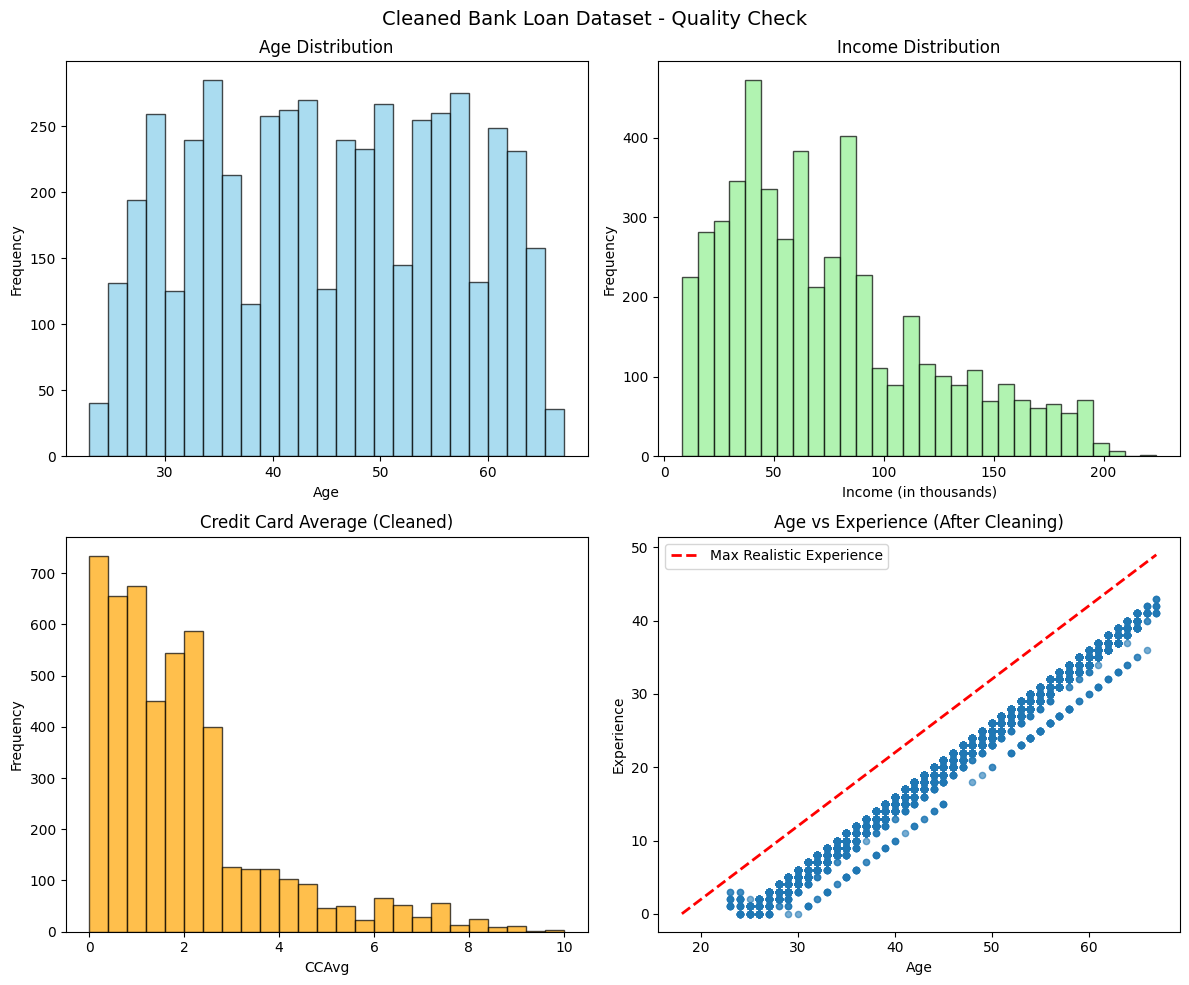

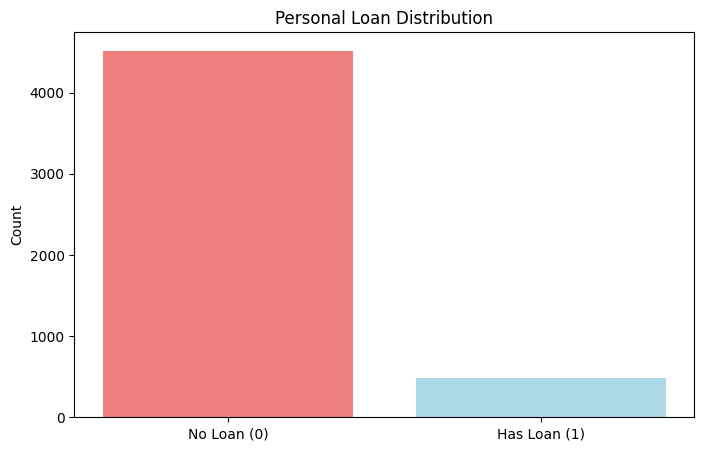

In [ ]:
#CREATE VISUALIZATIONS (data quality visualization of Bank Loan dataset)

print("\n DATA QUALITY VISUALIZATIONS")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cleaned Bank Loan Dataset - Quality Check', fontsize=14)

# Age distribution
axes[0, 0].hist(df_cleaned['age'], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Income distribution
axes[0, 1].hist(df_cleaned['income'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Income Distribution')
axes[0, 1].set_xlabel('Income (in thousands)')
axes[0, 1].set_ylabel('Frequency')


# CCAvg distribution (after cleaning)
axes[1, 0].hist(df_cleaned['ccavg'], bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Credit Card Average (Cleaned)')
axes[1, 0].set_xlabel('CCAvg')
axes[1, 0].set_ylabel('Frequency')


# Age vs Experience relationship
axes[1, 1].scatter(df_cleaned['age'], df_cleaned['experience'], alpha=0.6, s=20)
axes[1, 1].plot([18, df_cleaned['age'].max()], [0, df_cleaned['age'].max()-18],
                'r--', linewidth=2, label='Max Realistic Experience')
axes[1, 1].set_title('Age vs Experience (After Cleaning)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Experience')
axes[1, 1].legend()
plt.tight_layout()
plt.show()


# Personal Loan distribution
plt.figure(figsize=(8, 5))
loan_dist = df_cleaned['personal_loan'].value_counts()
plt.bar(['No Loan (0)', 'Has Loan (1)'], loan_dist.values, color=['lightcoral', 'lightblue'])
plt.title('Personal Loan Distribution')
plt.ylabel('Count')
plt.show()


In [ ]:
#FINAL VALIDATION & SAVE cleaned Bank Loan dataset

print("\n FINAL VALIDATION")
print("="*40)


# Check for any remaining issues

remaining_issues = {
  'Missing values': df_cleaned.isnull().sum().sum(),
  'Age-Experience issues': (df_cleaned['experience'] > df_cleaned['age'] - 18).sum(),
  'Negative values in experience': (df_cleaned['experience'] < 0).sum(),
  'Invalid CCAvg values': df_cleaned['ccavg'].isnull().sum()
}

print("Remaining data quality issues:")
for issue, count in remaining_issues.items():
  status = " RESOLVED" if count == 0 else f" {count} issues"
  print(f" {issue}: {status}")



# Save cleaned dataset
output_file = 'bank_loan_cleaned.csv'
df_cleaned.to_csv(output_file, index=False)


print(f"\n Cleaned dataset saved as '{output_file}'")
print("\n DATA CLEANING COMPLETED SUCCESSFULLY!")



# Final summary
print("\n CLEANING SUMMARY")
print("="*40)
print(f" Converted CCAvg from fraction format to decimal")
print(f" Fixed Age-Experience relationship inconsistencies")
print(f" Standardized column names (lowercase, underscores)")
print(f" Removed duplicates (if any)")
print(f" Validated data ranges and types")
print(f" Created data quality visualizations")
print(f" Saved cleaned dataset")
print(f"\nYour dataset is now ready for analysis! ")


 FINAL VALIDATION
Remaining data quality issues:
 Missing values:  RESOLVED
 Age-Experience issues:  RESOLVED
 Negative values in experience:  RESOLVED
 Invalid CCAvg values:  RESOLVED

 Cleaned dataset saved as 'bank_loan_cleaned.csv'

 DATA CLEANING COMPLETED SUCCESSFULLY!

 CLEANING SUMMARY
 Converted CCAvg from fraction format to decimal
 Fixed Age-Experience relationship inconsistencies
 Standardized column names (lowercase, underscores)
 Removed duplicates (if any)
 Validated data ranges and types
 Created data quality visualizations
 Saved cleaned dataset

Your dataset is now ready for analysis! 
